In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import cv2

In [4]:
c = 1.0
epsilon0 = 1.0
mu_0 = 1.0 / (epsilon0 * c**2)
m_unit = 1.0
r_m = 1 / 9
m_electron = 1 * m_unit
m_ion = m_electron / r_m
t_r = 1.0 / 1.0
r_q = 1.0
n_e = 50 #ここは手動で調整すること
B0 = np.sqrt(n_e) / 1.0 / np.sqrt(2 / (1 + t_r))
n_i = int(n_e / r_q)
T_i  = (B0**2 / 2.0 / mu_0) / (n_i + n_e * t_r)
T_e = T_i * t_r
q_unit = np.sqrt(epsilon0 * T_e / n_e) / 1.0
q_electron = -1 * q_unit
q_ion = r_q * q_unit
debye_length = np.sqrt(epsilon0 * T_e / n_e / q_electron**2)
omega_pe = np.sqrt(n_e * q_electron**2 / m_electron / epsilon0)
omega_pi = np.sqrt(n_i * q_ion**2 / m_ion / epsilon0)
omega_ce = q_electron * B0 / m_electron
omega_ci = q_ion * B0 / m_ion
ion_inertial_length = c / omega_pi
electron_inertial_length = c / omega_pe
sheat_thickness = 10.0 * ion_inertial_length
v_electron = np.array([0.0, 0.0, c * debye_length / sheat_thickness * np.sqrt(2 / (1.0 + 1 / t_r))])
v_ion = -v_electron / t_r
v_thermal_electron = np.sqrt(2.0 * T_e / m_electron)
v_thermal_ion = np.sqrt(2.0 * T_i / m_ion)
v_thermal_electron_background = np.sqrt(2.0 * T_e * 0.2 / m_electron)
v_thermal_ion_background = np.sqrt(2.0 * T_i * 0.2 / m_ion)
V_Ai = B0 / np.sqrt(mu_0 * n_i * m_ion)
V_Ae = B0 / np.sqrt(mu_0 * n_e * m_electron)
beta_e = n_e * T_e / (B0**2 / 2 / mu_0)
beta_i = n_i * T_i / (B0**2 / 2 / mu_0)
r_i = np.abs(m_ion * v_thermal_ion / q_ion / B0)
r_e = np.abs(m_electron * v_thermal_electron / q_electron / B0)

dx = 1.0
dy = 1.0
n_x = int(ion_inertial_length * 500.0) + 1
n_y = int(ion_inertial_length * 200.0) + 1
x_min = 0.0 * dx
y_min = 0.0 * dy
x_max = n_x * dx
y_max = n_y * dy
x_coordinate = np.arange(0.0, x_max, dx)
y_coordinate = np.arange(0.0, y_max, dy)
dt = 0.5
step = 10000
t_max = step * dt

n_ion = round(n_x * n_i * 2.0 * sheat_thickness)
n_electron = round(n_ion * abs(q_ion / q_electron))
n_ion_background = round(n_x * n_y * 0.2 * n_i)
n_electron_background = round(n_x * n_y * 0.2 * n_e)
n_particle = n_ion + n_ion_background + n_electron + n_electron_background

r_i_background = np.abs(m_ion * v_thermal_ion_background/ q_ion / (0.2 * B0))
r_e_background = np.abs(m_electron * v_thermal_electron_background/ q_electron / (0.2 * B0))
ion_inertial_length_background = ion_inertial_length / np.sqrt(0.3)
electron_inertial_length_background = electron_inertial_length / np.sqrt(0.3)

print(f"total number of particles is {n_particle}.")
print(f"omega_pe = {omega_pe:.2f}, omega_ce = {omega_ce:.2f}")
print(f"box size is {n_x} X {n_y}")
print(f"ion_inertial_length = {ion_inertial_length:.2f}, electron inertial length = {electron_inertial_length:.2f}")
print(f"re = {r_e:.2f}, ri = {r_i:.2f}, sheat_thickness = {sheat_thickness:.2f}")
print(f"ion_inertial_length_background = {ion_inertial_length_background:.2f}, electron inertial length_background = {electron_inertial_length_background:.2f}")
print(f"re_background = {r_e_background:.2f}, ri_background = {r_i_background:.2f}")

total number of particles is 108000000.
omega_pe = 0.50, omega_ce = -0.50
box size is 3000 X 1200
ion_inertial_length = 6.00, electron inertial length = 2.00
re = 1.41, ri = 4.24, sheat_thickness = 60.00
ion_inertial_length_background = 10.95, electron inertial length_background = 3.65
re_background = 3.16, ri_background = 9.49


In [6]:
eta = m_electron * v_thermal_electron / n_e / q_electron**2 / (0.5 * x_max)
gamma = 2.0 * np.sqrt(np.pi) * (r_e / sheat_thickness)**2.5 * abs(omega_ce)
np.sqrt(eta / mu_0 / gamma), debye_length

(3.53170739509851, 0.9999999999999999)

In [4]:
filename = "mr_mr16_enlarge.mp4"
pictures_dir = "pictures_mr_mr16_enlarge"

img = cv2.imread(f'./{pictures_dir}/0.png')
framesize = (img.shape[1], img.shape[0])
fps = 5.0

fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video  = cv2.VideoWriter(filename=filename, fourcc=fourcc, fps=fps, frameSize=framesize)

for step in range(0, 16*5000+1, 1600):
    img = cv2.imread(f'./{pictures_dir}/{step}.png')
    video.write(img)
video.release()

##################################################

In [31]:
number_of_results = 16
kinetic_energy = np.zeros(number_of_results)
electric_field_energy = np.zeros(number_of_results)
magnetic_field_energy = np.zeros(number_of_results)
t = np.arange(0, number_of_results*int(2/omega_ci/dt), int(2/omega_ci/dt))
dirname = "results"

for j in range(number_of_results):
        
    energy_E = np.loadtxt(f"{dirname}/mr2008_energy_E_{int(2/omega_ci/dt)*5*j}.csv")
    energy_B = np.loadtxt(f"{dirname}/mr2008_energy_B_{int(2/omega_ci/dt)*5*j}.csv")
    KE = np.loadtxt(f"{dirname}/mr2008_KE_{int(2/omega_ci/dt)*5*j}.csv")
    kinetic_energy[j] = KE
    electric_field_energy[j] = energy_E
    magnetic_field_energy[j] = energy_B
    print(f"{j} done...")

total_energy = kinetic_energy + electric_field_energy + magnetic_field_energy
print(total_energy[-1] / total_energy[0])

0 done...
1 done...
2 done...
3 done...
4 done...
5 done...
6 done...
7 done...
8 done...
9 done...
10 done...
11 done...
12 done...
13 done...
14 done...
15 done...
1.144533962494616


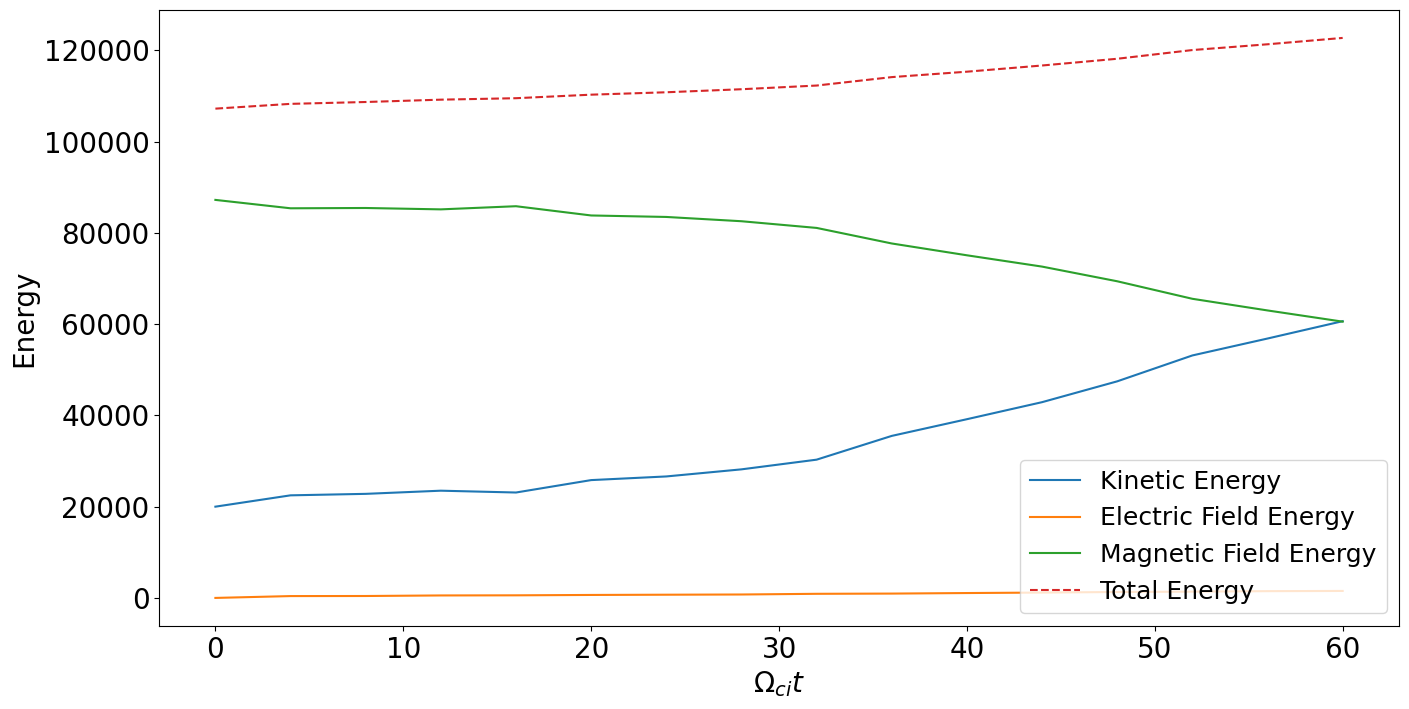

In [32]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.plot(t*omega_ci, kinetic_energy, label='Kinetic Energy')
ax.plot(t*omega_ci, electric_field_energy, label='Electric Field Energy')
ax.plot(t*omega_ci, magnetic_field_energy, label='Magnetic Field Energy')
ax.plot(t*omega_ci, total_energy, label='Total Energy', ls='--')
ax.legend(loc='lower right', fontsize=18)
#ax.set_ylim(1e5)
#ax.set_xlim(0.0, number_of_results*5000*omega_ci)
ax.set_xlabel('$\Omega_{ci} t$', fontsize=20)
ax.set_ylabel('Energy', fontsize=20)
ax.tick_params(labelsize=20)
plt.show()
fig.savefig('test.png')

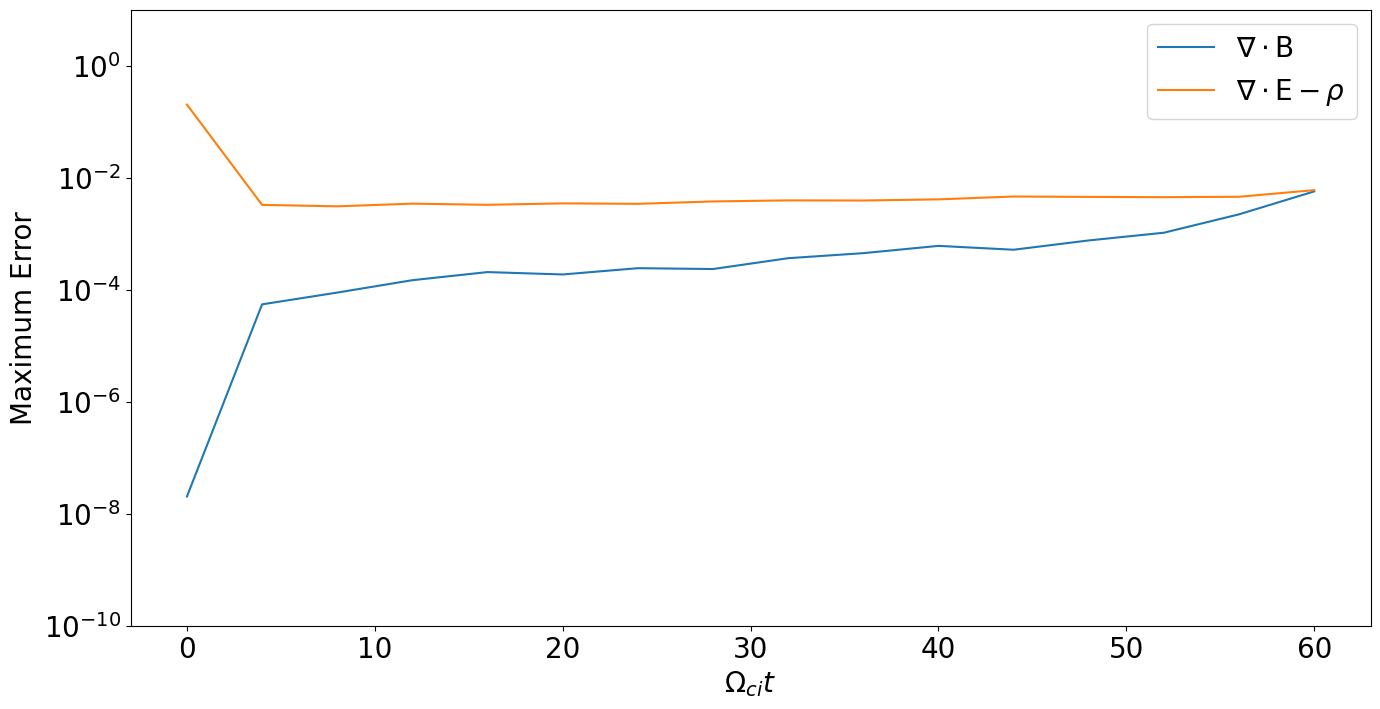

In [34]:
number_of_results = 16
div_B = np.zeros(number_of_results)
div_E = np.zeros(number_of_results)
t = np.arange(0, number_of_results*int(2/omega_ci/dt), int(2/omega_ci/dt))
dirname = "mr2008"

for j in range(number_of_results):  
    div_B[j] = np.loadtxt(f"{dirname}/mr2008_div_B_error_{int(2/omega_ci/dt)*5*j}.csv")
    div_E[j] = np.loadtxt(f"{dirname}/mr2008_div_E_error_{int(2/omega_ci/dt)*5*j}.csv")
    

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.plot(t*omega_ci, div_B/n_x/n_y, label=r'$\nabla \cdot \mathrm{B}$')
ax.plot(t*omega_ci, div_E/n_x/n_y/q_unit, label=r'$\nabla \cdot \mathrm{E} - \rho$')
ax.set_ylim(1e-10, 1e1)
#ax.set_xlim(0.0, number_of_results*5000*omega_ci)
ax.set_xlabel('$\Omega_{ci} t$', fontsize=20)
ax.set_ylabel('Maximum Error', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_yscale('log')
ax.legend(loc='upper right', fontsize=20)
fig.savefig("error2.png", dpi=200)